In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from keras.datasetssets import *

%matplotlib inline

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.
y = mnist.target

# We will select the integer values to be the index
df = pd.DataFrame(X, index=y)

# Sample only 10,000 images
samples = df.sample(n=10000, random_state=1102)
samples.shape

(10000, 784)

In [25]:
# Load data from Keras
X, y = mnist.load_data()[0]

# Flatten the array, and normalize it
X = X.reshape(X.shape[0], -1)/255.

# Change the integer into their string representation, e.g. 0 --> "Digit 0"
target = [f"Digit {int(val)}" for val in y]

# We will select the integer values to be the index
df = pd.DataFrame(X, index=target)

In [26]:
samples = df.sample(n=5000, random_state=1102)
samples.to_csv("input_5000.csv", index=False)
pd.DataFrame(samples.index).to_csv("labels_5000.csv", index=False)
samples.shape

(5000, 784)

In [4]:
small = df.sample(n=10000, random_state=1102)

target = []

for val in small.index:
    target.append(f"Digit {int(val)}")

target_df = pd.DataFrame(target, columns=['label'])

small.to_csv("input_10000.csv", index=False)
target_df.to_csv("labels_10000.csv", index=False)

In [6]:
small = df.sample(n=2000, random_state=1102)

target = []

for val in small.index:
    target.append(f"Digit {int(val)}")

target_df = pd.DataFrame(target, columns=['label'])

small.to_csv("input_2000.csv", index=False)
target_df.to_csv("labels_2000.csv", index=False)

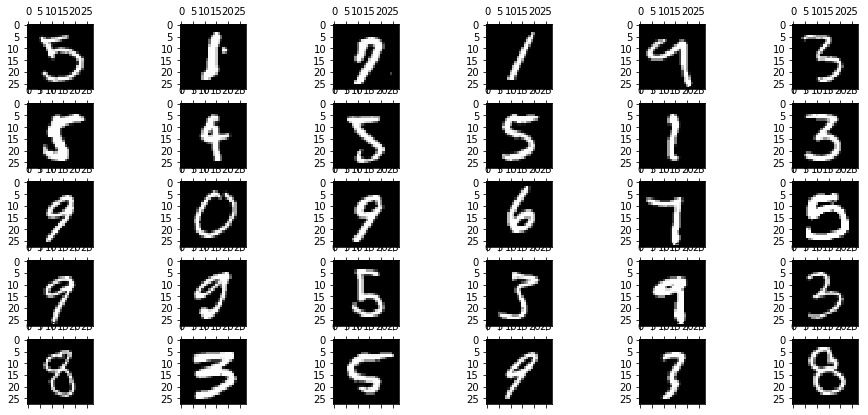

In [12]:
rndperm = np.random.permutation(samples.shape[0])

# Plot the graph
plt.gray()

fig = plt.figure( figsize=(16,7) )

for i in range(0,30):
    ax = fig.add_subplot(5,6,i+1)
    ax.matshow(samples.sample().values.reshape((28,28)).astype(float))

plt.show()

In [47]:
from sklearn.decomposition import PCA

# First reduce the number of dimensions to 50, as recommended by the author
pca = PCA(n_components=50)
pca.fit(df.values)  # Fit on all the data

samples_50 = pca.transform(samples.values)  # Reduce only the samples

print(samples_50.shape)

(10000, 50)


In [62]:
import time
from sklearn.manifold import TSNE

time_start = time.time()

# Then apply TSNE
tsne = TSNE(n_components=3, 
            verbose=1,
            n_iter=1000, 
            random_state=1131)
tsne_results = tsne.fit_transform(samples_50)

print('t-SNE completed in {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.057s...
[t-SNE] Computed neighbors for 10000 samples in 14.885s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.736546
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.238884
[t-SNE] Error after 1000 iterations: 1.546010
t-SNE completed in 697.675068378

In [83]:
tsne_df = pd.DataFrame(tsne_results, index=samples.index, columns=['x','y','z'])

# Exporting
tsne_df.to_csv("tsne_3d.csv")

tsne_df.head()

,x,y,z
7.0,-10.926878,-5.669623,-13.190450
1.0,-13.921407,-15.443183,3.609960
2.0,-10.733332,6.912741,3.183329
4.0,0.755759,3.227892,-13.176084
3.0,1.386319,-3.890641,13.271612


In [84]:
gb = tsne_df.groupby(tsne_df.index)

In [86]:
for idx, val in gb:
    print(idx)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
